# TP - Tom Chauvel ( Groupe 1a )

# Partie 1

In [81]:
def pred(g):
    """ on reçoit un graphe donné par les successeurs de chaque sommet,
        et on retourne, avec la même structure, la liste des prédécesseurs
    """
    n = len(g)
    resul = [ [] for _ in range(n) ]
    for x in range(n):
        for y in g[x]:
            resul[y].append(x)
    return resul

def countPred(g):
    """
    renvoie une liste avec le nombre de prédécesseurs pour chaque sommet
    """
    return [len(it) for it in pred(g)]

def countSucc(g):
    """
    renvoie une liste avec le nombre de successeurs pour chaque sommet
    """
    return [len(it) for it in g]

def estSymetrique(g):
    """
    si g est égale aux prédécesseurs, cela veut dire que notre graphe est symétrique
    """
    return g == pred(g)

In [82]:
g = [[1],[2,1],[0,2,1]]

In [83]:
print(countPred(g))
print(countSucc(g))

[1, 3, 2]
[1, 2, 3]


In [84]:
print(estSymetrique(g))
print(estSymetrique([[1],[0,2],[1,2]]))

False
True


In [85]:
def parcours(g,i,parcourus):
    parcourus.add(i)
    for j in g[i]:
        if j not in parcourus:
            parcourus = parcours(g,j,parcourus)
    return parcourus

def composantesConnexes(g):
    aParcourir = set(range(len(g)))

    listeRetour = []

    while len(aParcourir) > 0:
        sommet = aParcourir.pop()
        thisparcourus = parcours(g,sommet,set())
        aParcourir -= thisparcourus

        listeRetour.append(len(thisparcourus))

    print(f'Nombre de composantes connexes : {len(listeRetour)}, tailles : {listeRetour}')


In [86]:
composantesConnexes([[1],[0],[2],[4,5],[3],[3]])
composantesConnexes([[1,2],[0,2],[0,1],[3],[4],[5,6],[5,7],[7,6]])

Nombre de composantes connexes : 3, tailles : [2, 1, 3]
Nombre de composantes connexes : 4, tailles : [3, 1, 1, 3]


In [87]:
def maxVal(g,w):
    """ On retourne un arc avec la valeur (poids) max
        dans le graphe valué (g,w), et cette valeur max
    """
    inf = float('inf') # --- réel infini
    n = len(g) # --- # de sommets de G

    vmx = -inf
    xmx = -1
    ymx = -1
    for x in range(n): # --- pour chaque sommet x
        for i in range(len(g[x])): # --- pour chaque position i dans
                                   #     la liste des successeurs de x
            y = g[x][i]
            v = w[x][i]
            if v > vmx:
                vmx, xmx, ymx = v, x, y
    return vmx,xmx,ymx

def maxValPrint(g,w):
    vmx,xmx,ymx = maxVal(g,w)
    print(f'Arc avec poids maximal : {xmx,ymx} , Poids : {vmx}')


In [88]:
maxValPrint([ [1], [2,3], [1,3], [] ],[ [10], [9,16], [-4,10], [] ])

Arc avec poids maximal : (1, 3) , Poids : 16


# Partie 2

In [89]:
# exemple td
import numpy as np

g0 = [[1,2,5],[0,2,3,4],[0,1],[1,4,5],[0,3,5],[3,4]]
w0 = [[2,2,5],[2,2,4,5],[2,2],[4,1,3],[5,1,3],[3,3]]

# --- un graphe à 5 sommets ; val min = 8
g1 = [ [1,3,4], [0,2,3,4], [1,3,4], [0,1,2,4], [0,1,2,3] ]
w1 = [ [2,5,5], [2,6,3,4], [6,2,2], [5,3,2,1], [5,4,2,1] ]

# --- l'exemple dans les slides, 8 sommets ; val min = 50
g2 = [ [1,2,3], [0,5], [0,3,4,5], [0,2,4,7],
          [2,3,5,6,7], [1,2,4,6], [4,5,7], [3,4,6] ]

w2 = [ [4,6,16], [4,24], [6,8,5,23], [16,8,10,21],
          [5,10,18,11,14], [24,23,18,9], [11,9,7], [21,14,7] ]

## Prim

In [90]:
import heapq as hq
"""
heapq est une file stocké sur le tas (heap) 
qui à comme avantage de trier automatiquement
les éléments présents dans la file. C'est plus 
efficace que de trier à chaque fois.
"""

def prim(g,w,sommetDepart=0):
    aParcourir = []
    parcourus = set()

    somme = 0  # poids de l'arbre couvrant minimal
    arbre = [] # l'arbre couvrant minimal 

    n = len(g)

    # on ajoute notre sommet de départ à visiter
    hq.heappush(aParcourir,(0,None,sommetDepart))
    
    while len(aParcourir) > 0:
        # tant qu'on a des éléments dans notre file, on récupère l'élément de poids minimal
        poids,pre,sommet = hq.heappop(aParcourir) # heappop enlève le premier élément de la file triée
        
        if len(parcourus) == n : break

        if sommet not in parcourus:
            # on visite celui qui à le poids minimal
            somme += poids
            if pre != None:
                arbre.append((pre,sommet))
            parcourus.add(sommet)
            for i in range(len(g[sommet])):
                j,p = g[sommet][i],w[sommet][i]
                if j not in parcourus:
                    # et on ajoute tout ses successeurs non visités dans notre file
                    hq.heappush(aParcourir,(p,sommet,j))

    return arbre,somme

In [91]:
p0 = prim(g0,w0)
p1 = prim(g1,w1)
p2 = prim(g2,w2)

print(f'Parcours : {p0[0]} \n Poids : {p0[1]} \n')
print(f'Parcours : {p1[0]} \n Poids : {p1[1]} \n')
print(f'Parcours : {p2[0]} \n Poids : {p2[1]} \n')

Parcours : [(0, 1), (0, 2), (1, 3), (3, 4), (3, 5)] 
 Poids : 12 

Parcours : [(0, 1), (1, 3), (3, 4), (3, 2)] 
 Poids : 8 

Parcours : [(0, 1), (0, 2), (2, 4), (2, 3), (4, 6), (6, 7), (6, 5)] 
 Poids : 50 



## Kruskal

In [92]:
import heapq as hq

# j'ai modifié votre code en mettant la heapq, les résultats avec sont vachement meilleurs :)

def listeAretes(G, w):
    """
    Cette fonction retourne la liste des arêtes du graphe non orienté G triée par poids croissants. 
    Chaque élément de la liste est une arête donnée par ses extrémités, suivies par le poids de l'arête.

    :param G: une liste d'adjacence représentant un graphe non orienté.
    :param w: une matrice des poids associés à chaque arête du graphe G.
    :return: la liste des arêtes du graphe non orienté G triée par poids croissants.

    """
    # obtenir le nombre de sommets dans le graphe G
    n = len(G)
    # initialiser une liste pour stocker les arêtes triées par poids croissants
    liste = []
    # parcourir tous les sommets dans le graphe G
    for u in range(n):
        # parcourir tous les voisins du sommet u
        for j in range(len(G[u])):
            # obtenir le voisin v de u et le poids associé à l'arête (u, v)
            v = G[u][j]
            poids = w[u][j]
            # vérifier si l'arête (u, v) a été déjà ajoutée ou pas
            if u < v:
                # ajouter l'arête (u, v) avec son poids à la file
                hq.heappush(liste,(poids,u, v))
    return liste

def Kruskal(G,w):
    """ Implémente l'algorithme de Kruskal pour trouver un arbre couvrant minimum
        dans un graphe non orienté pondéré.
        
        Args:
        G (list): une liste d'adjacence représentant les sommets et les arêtes du graphe
        w (list): une liste représentant les poids des arêtes
        
        Returns:
        La somme des poids des arêtes de l'arbre couvrant minimum.
    """
    
    n = len(G)
    liste = listeAretes(G,w) # On récupère la liste triée des arêtes du graphe
    
    # Initialisation des variables
    # u1 = liste[0][0] 
    # v1 = liste[0][1]
    # val = liste[0][2]
    val,u1,v1 = hq.heappop(liste) # On prend la première arête de la liste triée
    mark = [-1 for _ in range(n)] # On initialise la liste des classes des sommets
    
    F = [ [u1,1], [v1,1] ] # On initialise la forêt avec les deux premiers sommets de la première arête
    classMax = 1
    nbAretes = 1
    mark[u1] = 1
    mark[v1] = 1
    aretes = [ [u1,v1] ]
    
    while nbAretes < n - 1:
        # On sélectionne l'arête suivante dans la liste des arêtes triées par ordre croissant des poids
        poids,u,v = hq.heappop(liste)

        # Si l'un des deux sommets u ou v est déjà dans une classe, et que l'autre ne l'est pas encore
        if mark[u] != -1 and mark[v] == -1:
            c = mark[u] # On récupère la classe de u
            mark[v] = c # On affecte la même classe à v
            val += poids # On met à jour la valeur du poids total
            F.append([v,c]) # On ajoute le sommet v à la classe c dans la forêt
            aretes.append([u,v]); nbAretes += 1 # On ajoute l'arête (u,v) à la liste des arêtes sélectionnées
       
        elif mark[u] == -1 and mark[v] != -1:
            c = mark[v] # On récupère la classe de v
            mark[u] = c
            val += poids 
            F.append([u,c])
            aretes.append([u,v]); nbAretes += 1 
       
        # Si aucun des deux sommets u et v n'est encore dans une classe
        elif mark[u] == -1 and mark[v] == -1:
            classMax += 1 # On crée une nouvelle classe
            mark[u] = classMax # On affecte la nouvelle classe à u
            mark[v] = classMax
            val += poids 
            F.append([u,classMax]) # On crée une nouvelle classe contenant le sommet u dans la forêt
            F.append([v,classMax])
            aretes.append([u,v]); nbAretes += 1 
       
        # Si les deux sommets u et v sont déjà dans des classes différentes
        elif mark[u] != -1 and mark[v] != -1 and mark[u] != mark[v]:
            # On fusionne les deux classes en gardant le numéro de classe le plus petit
            c = mark[u]; d = mark[v]
            if c < d:
                # On met à jour toutes les occurences de la classe d dans la forêt par la classe c
                for x in range(len(F)):
                    if F[x][1] == d: F[x][1] = c
            else: # c > d
                # On met à jour toutes les occurences de la classe c dans la forêt par la classe d
                for x in range(len(F)):
                    if F[x][1] == c: F[x][1] = d
            val += poids # On met à jour la valeur du poids total
            aretes.append([u,v]); nbAretes += 1
            # else = (mark[u] == mark[v] > -1), donc, on ne fait rien

    return aretes,val

In [93]:
k0 = Kruskal(g0,w0)    
k1 = Kruskal(g1,w1)    
k2 = Kruskal(g2,w2)

print(f'Parcours : {k0[0]} \n Poids : {k0[1]} \n')
print(f'Parcours : {k1[0]} \n Poids : {k1[1]} \n')
print(f'Parcours : {k2[0]} \n Poids : {k2[1]} \n')

# on obtient pareil qu'avec Prim ✅

Parcours : [[3, 4], [0, 1], [0, 2], [3, 5], [1, 3]] 
 Poids : 12 

Parcours : [[3, 4], [0, 1], [2, 3], [1, 3]] 
 Poids : 8 

Parcours : [[0, 1], [2, 4], [0, 2], [6, 7], [2, 3], [5, 6], [4, 6]] 
 Poids : 50 



# Partie 3
## Dijsktra

In [94]:
import numpy as np
import heapq as hq

def Dijsktra(G,w,s=0):
    """
    c'est un Dijsktra que j'avais pû voir sur internet il y quelques mois 
    et qui est censé être un peu plus rapide grâce encore à notre heapq
    """

    # initialisation
    aParcourir = []
    d = [ np.inf for i in range(len(G)) ]
    p = [ None for i in range(len(G)) ]

    # on marque le sommet 0, et on le met à visiter
    hq.heappush(aParcourir,(0,s))
    d[s] = 0
    
    while len(aParcourir) > 0:
        # tant qu'on a un sommet visiter
        poids,u = hq.heappop(aParcourir)   
        if poids > d[u]: continue # si son poids est inférieur ou égal à ce qu'on à dans notre tableau d 

        for i in range(len(G[u])): # on visiste tout les successeurs de u
            v = G[u][i]
            w_actual = poids + w[u][i]

            if w_actual < d[v]: # si on améliore la distance au successeur
                d[v] = w_actual
                p[v] = u
                # on met à jour p et d et on ajoute le successeur à visiter
                hq.heappush(aParcourir,(w_actual,v))
    
    return d,p

In [95]:
print( Dijsktra(g0,w0,0) )    
print( Dijsktra(g1,w1,0) )
print( Dijsktra(g2,w2,0) )
print( Dijsktra([[1,2,3],[3],[3,5],[5],[1,5],[]],[[1,1,4],[2],[3,8],[5],[2,1],[]],0) )

([0, 2, 2, 6, 7, 5], [None, 0, 0, 1, 1, 0])
([0, 2, 7, 5, 5], [None, 0, 3, 0, 0])
([0, 4, 6, 14, 11, 28, 22, 25], [None, 0, 0, 2, 2, 1, 4, 4])
([0, 1, 1, 3, inf, 8], [None, 0, 0, 1, None, 3])


## Bellman-Ford
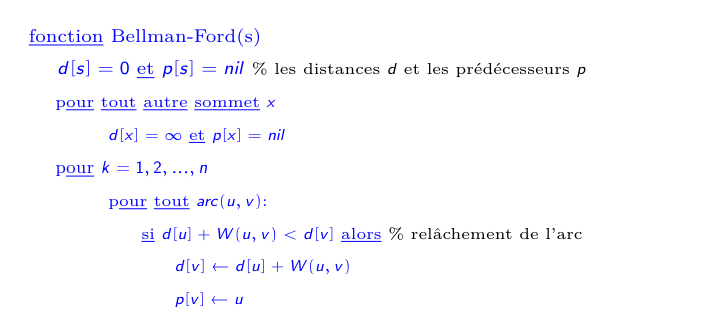


In [96]:
def BellmanFord(G,w,s=0):
    """
    c'est le même algorithme que celui en image juste au dessus, j'ai juste ajouté une condition
    si on ne modifie plus notre liste, on sort de la boucle
    """
    
    aParcourir = []

    d = [ np.inf for i in range(len(G)) ]
    p = [ None for i in range(len(G)) ]

    d[s] = 0

    changed = True

    k = 0
    
    while changed and k <= len(G) :
        changed = False
        for i in range(len(G)):
            u = i
            arcs = G[u]
            for j in range(len(arcs)):
                v = arcs[j]
                weight = d[u] + w[u][j]
                if weight < d[v]:
                    d[v] = weight
                    p[v] = u
                    changed = True
        k+=1
    return d,p

In [97]:
print( BellmanFord(g0,w0,0) )    
print( BellmanFord(g1,w1,0) )
print( BellmanFord(g2,w2,0) )
print( BellmanFord([[1,2],[3],[3,5],[5],[1,5],[]],[[1,1,4],[2],[3,8],[5],[2,1],[]],0) )
print( BellmanFord([[1,2],[2],[3],[]],[[4,2],[-3],[1],[]],0) )

([0, 2, 2, 6, 7, 5], [None, 0, 0, 1, 1, 0])
([0, 2, 7, 5, 5], [None, 0, 3, 0, 0])
([0, 4, 6, 14, 11, 28, 22, 25], [None, 0, 0, 2, 2, 1, 4, 4])
([0, 1, 1, 3, inf, 8], [None, 0, 0, 1, None, 3])
([0, 4, 1, 2], [None, 0, 1, 2])


# Partie 4

In [98]:
import random as rd

def K(n):
     """ 
     on fabrique un graphe complet avec n >= 2 sommets
     et on génère des poids aléatoires pour chaque arc
     """
     K = [ [x for x in range(n) if x != y] for y in range(n) ]
     W = [ [ rd.random() for x in y ] for y in K ]

     return K,W

In [99]:
import matplotlib.pyplot as plt
import time
def bunch(callback,n=10):
    """
    on fait une moyenne de temps pour chaque algorithme
    """
    a = time.time()
    for i in range(n):
        callback()
    return (time.time() - a)/n

x=[]
BellmanFordData = []
DijkstraData = []
PrimData = []
KruskalData = []

for i in range(2,100):
    x.append(i)
    g,w = K(i)
    
    """
    une lambda c'est juste une fonction anonyme en python
    
    a = lambda x : x*2
    
    équivaut à 
    
    def a(x)
        return x*2

    l'avantage, c'est que je peux mettre ma fonction anonyme en paramètre d'une fonction pour éviter les répétitions de code
    """
    
    BellmanFordData.append( bunch( lambda : BellmanFord(g,w) ) )
    DijkstraData.append( bunch( lambda : Dijsktra(g,w) ) )
    PrimData.append( bunch( lambda : prim(g,w) ) )
    KruskalData.append( bunch( lambda : Kruskal(g,w) ) )

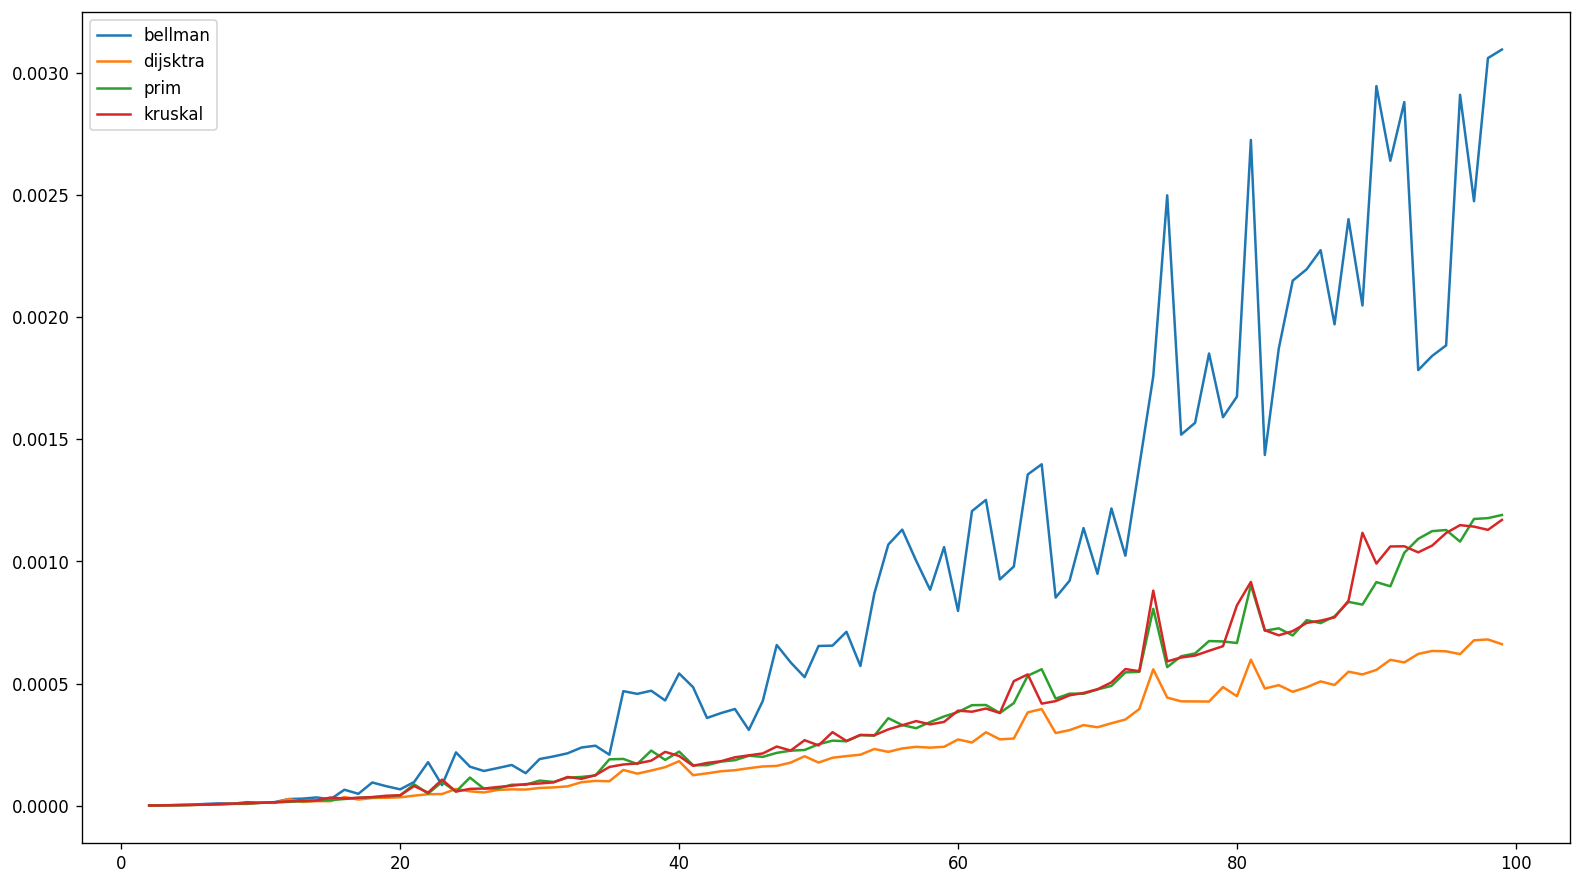

In [100]:
plt.figure(figsize=(16,9), dpi=120)

plt.plot(x,BellmanFordData,label="bellman")
plt.plot(x,DijkstraData,label="dijsktra")
plt.plot(x,PrimData,label="prim")
plt.plot(x,KruskalData,label="kruskal")

plt.legend()
plt.show()

Sur des gros graphes, Dijskra est beaucoup plus efficace que Bellman-Ford pour déterminer le chemin le plus court, ce qui est logique comme la complexité de Dijskra est $O(n log(n))$ alors que Bellman-Ford est en $O(n^3)$.

Cepedant Kruskal (après mes petites modifications :) ) est aussi rapide que Prim pour déterminer le poids de l'arbre couvrant. Cela est normal car l'utilisation du tas donne la même complexité aux deux algorithmes, c'est à dire $O(E log V)$ avec E le nombre d'arcs et V le nombre de sommets ( source Wikipédia ).

Des pics aléatoires peuvent apparaitre, cela est dû à la génération aléatoire des poids.

Pour vous dire l'intéret de la heapq, avant sa mise en place dans l'algorithme de Kruskal, il y avait plein de pics dans le temps, d'éxécution, alors que maintenant, la courbe est plûtot lisse.

En dessous un exemple avec 200 itérations

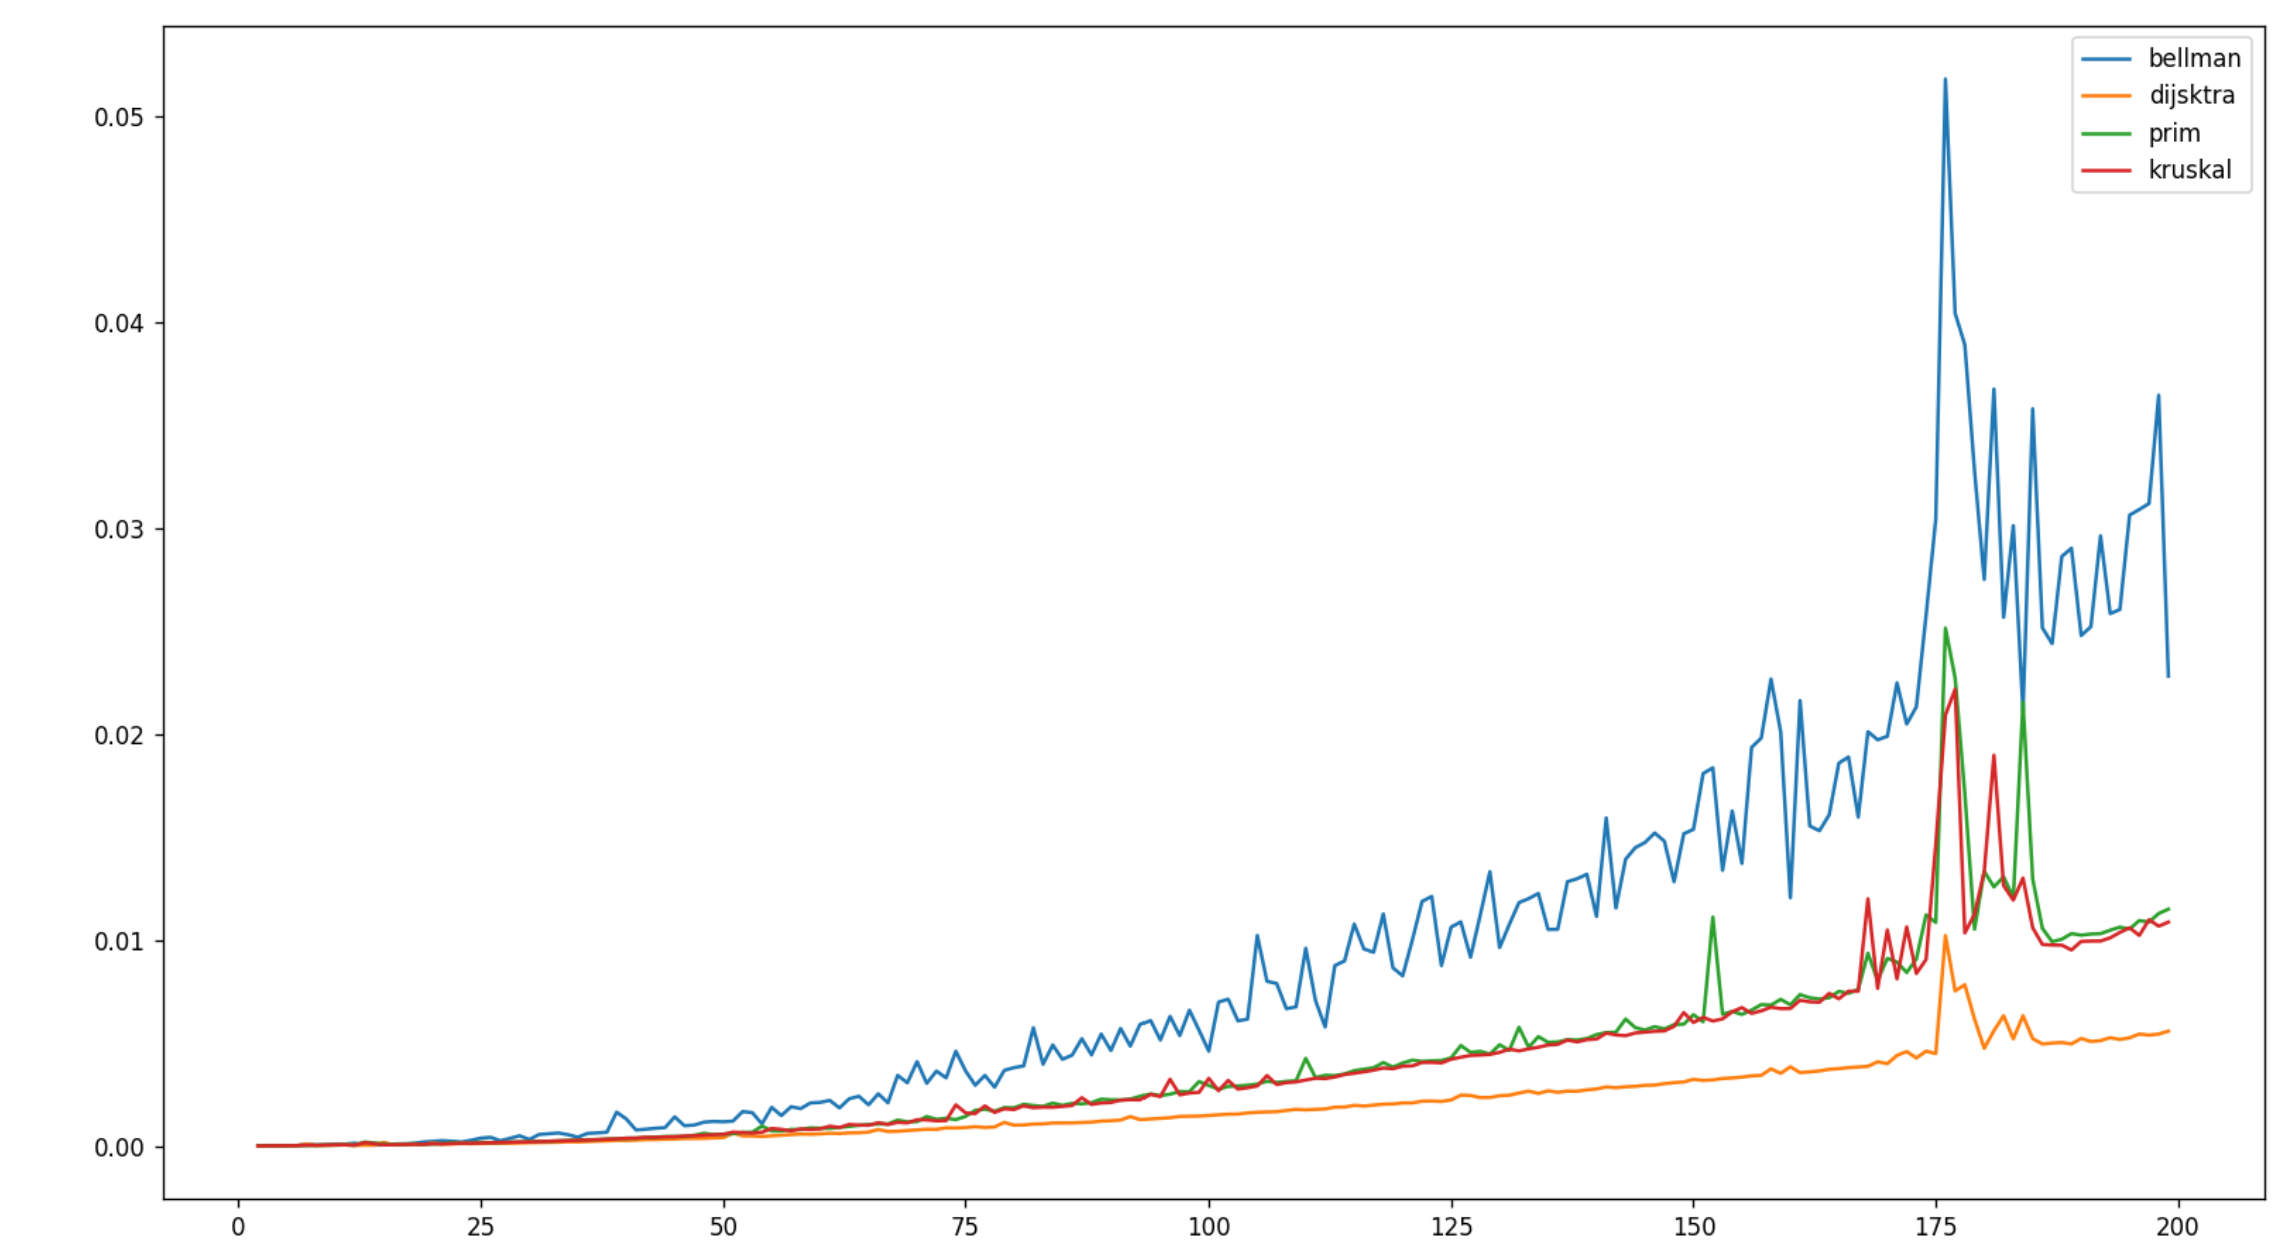